In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import set_style
set_style('whitegrid')
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
gross_data = pd.read_csv('https://raw.githubusercontent.com/tacookson/data/master/broadway-grosses/grosses.csv',parse_dates = ['week_ending'])
show_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/show_info_1985-2019.csv')
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])

In [3]:
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])
CPI_data.rename(columns = {'CWSR0000SA0':'CPI'}, inplace = True)
gross_data['year'] = gross_data['week_ending'].dt.year
gross_data['month_c'] = [d.strftime('%b') for d in gross_data.week_ending]
gross_data['month'] = gross_data['week_ending'].dt.month
CPI_data['year'] = CPI_data['DATE'].dt.year
CPI_data['month']= CPI_data['DATE'].dt.month
gross_data

week_ending  week_number  weekly_gross_overall  \
0      1985-06-09            1            3915937.00   
1      1985-06-09            1            3915937.00   
2      1985-06-09            1            3915937.00   
3      1985-06-09            1            3915937.00   
4      1985-06-09            1            3915937.00   
...           ...          ...                   ...   
47519  2020-03-01           40           26109896.25   
47520  2020-03-01           40           26109896.25   
47521  2020-03-01           40           26109896.25   
47522  2020-03-01           40           26109896.25   
47523  2020-03-01           40           26109896.25   

                                show                       theatre  \
0                        42nd Street             St. James Theatre   
1                      A Chorus Line        Sam S. Shubert Theatre   
2                     Aren't We All?       Brooks Atkinson Theatre   
3                   Arms and the Man  Circle in the Square Theatre   
4                              As Is                Lyceum Theatre   
...                              ...                           ...   
47519       The Phantom of the Opera              Majestic Theatre   
47520  Tina: The Tina Turner Musical         Lunt-Fontanne Theatre   
47521          To Kill A Mockingbird        Sam S. Shubert Theatre   
47522                West Side Story              Broadway Theatre   
47523                         Wicked              Gershwin Theatre   

       weekly_gross  potential_gross  avg_ticket_price  top_ticket_price  \
0         282368.00              NaN             30.42               NaN   
1         222584.00              NaN             27.25               NaN   
2         249272.00              NaN             33.75               NaN   
3          95688.00              NaN             20.87               NaN   
4          61059.00              NaN             20.78               NaN   
...             ...              ...               ...               ...   
47519     639215.93        1358986.0             72.18             213.0   
47520    1320766.00        1566688.0            132.02             297.0   
47521    1132278.54        1549625.0            115.41             423.0   
47522    1598947.32        1722464.0            114.87             373.0   
47523    1202089.50        1779845.0             96.33             250.0   

       seats_sold  seats_in_theatre  pct_capacity  performances  previews  \
0            9281              1655        0.7010             8         0   
1            8167              1472        0.6935             8         0   
2            7386              1088        0.8486             8         0   
3            4586               682        0.8405             8         0   
4            2938               684        0.5369             8         0   
...           ...               ...           ...           ...       ...   
47519        8856              1605        0.6897             8         0   
47520       10004              1478        0.8461             8         0   
47521        9811              1435        0.9767             7         0   
47522       13920              1740        1.0000             8         0   
47523       12479              1807        0.8632             8         0   

       year month_c  month  
0      1985     Jun      6  
1      1985     Jun      6  
2      1985     Jun      6  
3      1985     Jun      6  
4      1985     Jun      6  
...     ...     ...    ...  
47519  2020     Mar      3  
47520  2020     Mar      3  
47521  2020     Mar      3  
47522  2020     Mar      3  
47523  2020     Mar      3  

[47524 rows x 17 columns]

In [4]:
CPI_data['CPI'] = CPI_data.iloc[-1]['CPI']/CPI_data['CPI']
CPI_data

DATE        CPI  year  month
0   1947-01-01  13.148889  1947      1
1   1947-02-01  13.064213  1947      2
2   1947-03-01  12.839783  1947      3
3   1947-04-01  12.839783  1947      4
4   1947-05-01  12.863043  1947      5
..         ...        ...   ...    ...
899 2021-12-01   1.031327  2021     12
900 2022-01-01   1.024507  2022      1
901 2022-02-01   1.015750  2022      2
902 2022-03-01   1.001908  2022      3
903 2022-04-01   1.000000  2022      4

[904 rows x 4 columns]

### Updating the value of dollars of previous years to present dollar value 

In [5]:
CPI_data2 = CPI_data[['CPI','month','year']]
gross_data2 = gross_data.merge(CPI_data2, how = 'left', on = ['month', 'year'])
gross_data['weekly_gross_overall'] = gross_data2['weekly_gross_overall']*gross_data2['CPI']
gross_data['weekly_gross'] = gross_data2['weekly_gross']*gross_data2['CPI']
gross_data['avg_ticket_price'] = gross_data2['avg_ticket_price']*gross_data2['CPI']
gross_data['potential_gross'] = gross_data2['potential_gross']*gross_data2['CPI']
gross_data['top_ticket_price']= gross_data2['top_ticket_price']*gross_data2['CPI']
gross_data['year']=gross_data.year.astype(int).astype(str)
gross_data

week_ending  week_number  weekly_gross_overall  \
0      1985-06-09            1          1.040401e+07   
1      1985-06-09            1          1.040401e+07   
2      1985-06-09            1          1.040401e+07   
3      1985-06-09            1          1.040401e+07   
4      1985-06-09            1          1.040401e+07   
...           ...          ...                   ...   
47519  2020-03-01           40          2.949006e+07   
47520  2020-03-01           40          2.949006e+07   
47521  2020-03-01           40          2.949006e+07   
47522  2020-03-01           40          2.949006e+07   
47523  2020-03-01           40          2.949006e+07   

                                show                       theatre  \
0                        42nd Street             St. James Theatre   
1                      A Chorus Line        Sam S. Shubert Theatre   
2                     Aren't We All?       Brooks Atkinson Theatre   
3                   Arms and the Man  Circle in the Square Theatre   
4                              As Is                Lyceum Theatre   
...                              ...                           ...   
47519       The Phantom of the Opera              Majestic Theatre   
47520  Tina: The Tina Turner Musical         Lunt-Fontanne Theatre   
47521          To Kill A Mockingbird        Sam S. Shubert Theatre   
47522                West Side Story              Broadway Theatre   
47523                         Wicked              Gershwin Theatre   

       weekly_gross  potential_gross  avg_ticket_price  top_ticket_price  \
0      7.502061e+05              NaN         80.821017               NaN   
1      5.913697e+05              NaN         72.398840               NaN   
2      6.622754e+05              NaN         89.668288               NaN   
3      2.542275e+05              NaN         55.448213               NaN   
4      1.622239e+05              NaN         55.209097               NaN   
...             ...              ...               ...               ...   
47519  7.219681e+05     1.534919e+06         81.524345        240.574751   
47520  1.491751e+06     1.769510e+06        149.111167        335.449300   
47521  1.278862e+06     1.750238e+06        130.350854        477.761125   
47522  1.805945e+06     1.945452e+06        129.740947        421.288179   
47523  1.357711e+06     2.010262e+06        108.800778        282.364731   

       seats_sold  seats_in_theatre  pct_capacity  performances  previews  \
0            9281              1655        0.7010             8         0   
1            8167              1472        0.6935             8         0   
2            7386              1088        0.8486             8         0   
3            4586               682        0.8405             8         0   
4            2938               684        0.5369             8         0   
...           ...               ...           ...           ...       ...   
47519        8856              1605        0.6897             8         0   
47520       10004              1478        0.8461             8         0   
47521        9811              1435        0.9767             7         0   
47522       13920              1740        1.0000             8         0   
47523       12479              1807        0.8632             8         0   

       year month_c  month  
0      1985     Jun      6  
1      1985     Jun      6  
2      1985     Jun      6  
3      1985     Jun      6  
4      1985     Jun      6  
...     ...     ...    ...  
47519  2020     Mar      3  
47520  2020     Mar      3  
47521  2020     Mar      3  
47522  2020     Mar      3  
47523  2020     Mar      3  

[47524 rows x 17 columns]

Text(0, 0.5, 'Weekly Gross(Overall)')

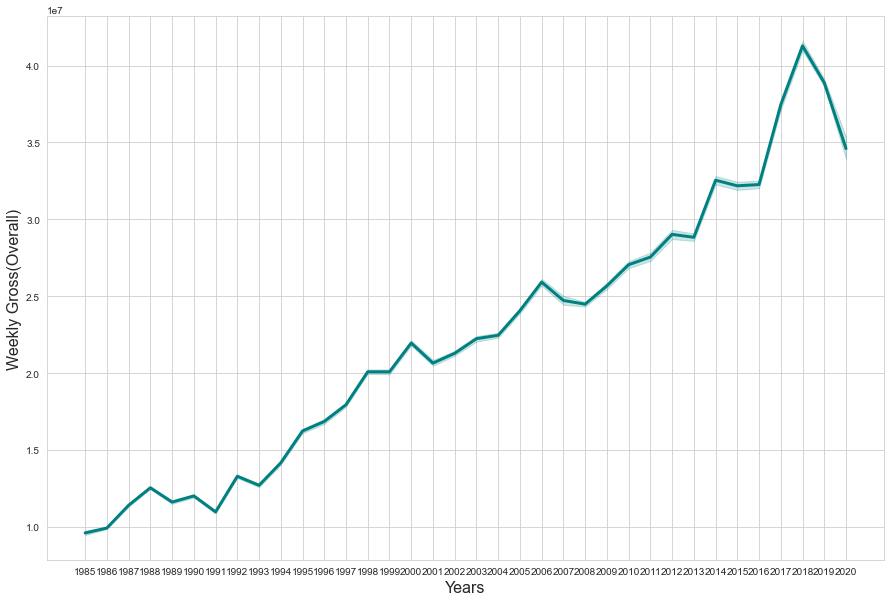

In [6]:
sns.lineplot(x=gross_data['year'],y=gross_data['weekly_gross_overall'],color="teal",linewidth="3")
plt.xlabel('Years',fontsize=16)
plt.ylabel('Weekly Gross(Overall)',fontsize=16)

Text(0.5, 1.0, 'Average ticket price per year')

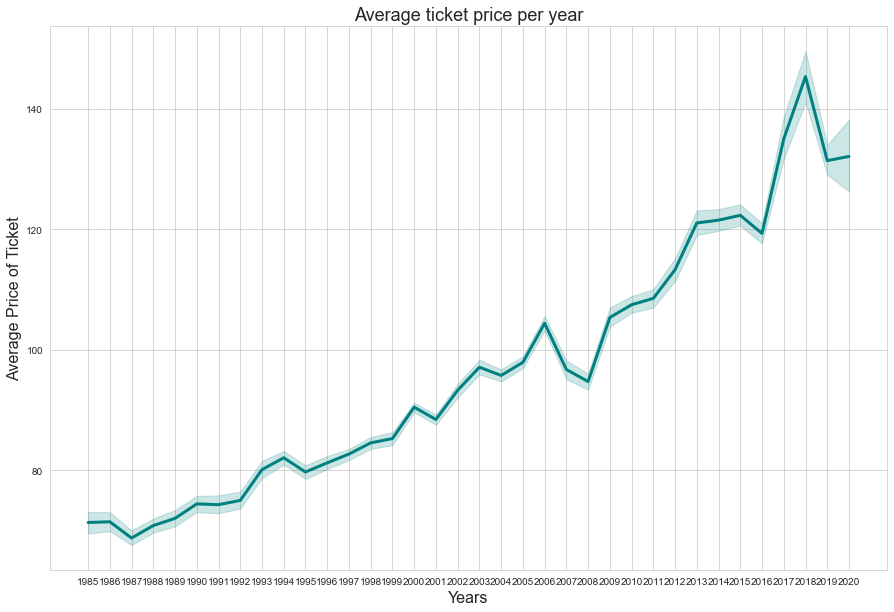

In [7]:
sns.lineplot(x=gross_data['year'],y=gross_data['avg_ticket_price'],color="teal",linewidth="3")
plt.xlabel('Years',fontsize=16)
plt.ylabel('Average Price of Ticket',fontsize=16)
plt.title('Average ticket price per year',fontsize=18)

Text(0.5, 1.0, 'Theater seats Sold every year')

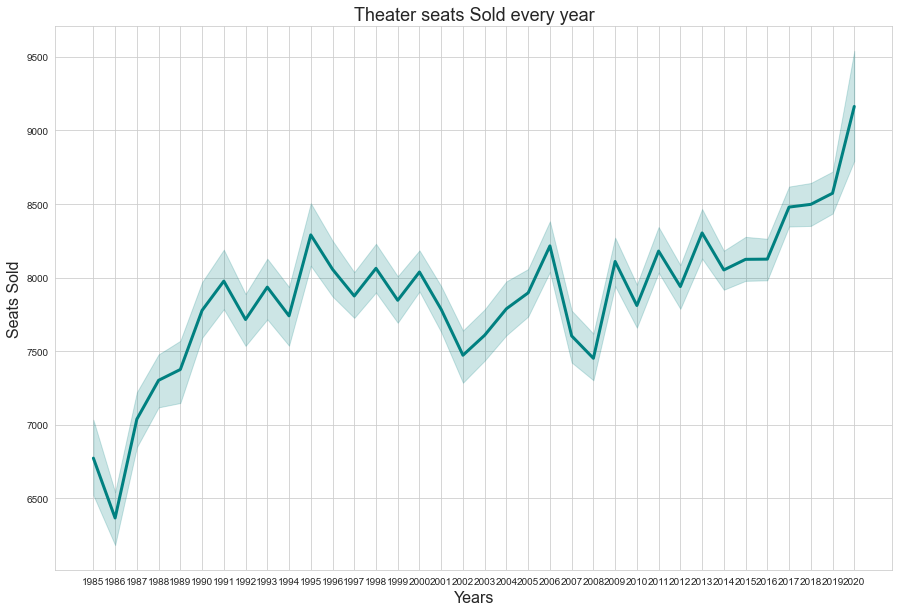

In [8]:
sns.lineplot(x=gross_data['year'],y=gross_data['seats_sold'],color="teal",linewidth="3")
plt.xlabel('Years',fontsize=16)
plt.ylabel('Seats Sold',fontsize=16)
plt.title('Theater seats Sold every year',fontsize=18)

Text(0.5, 1.0, 'Percentage Capacity every year')

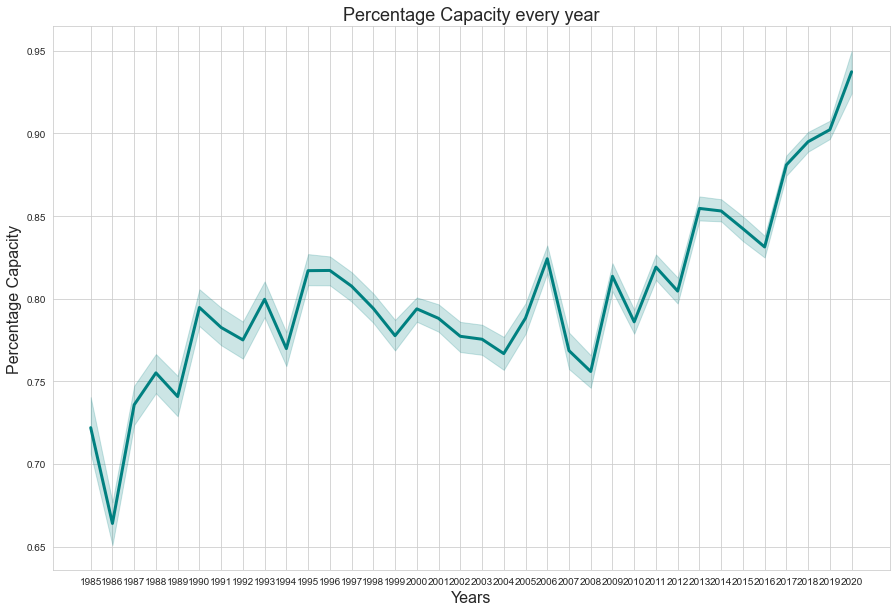

In [9]:
sns.lineplot(x=gross_data['year'],y=gross_data['pct_capacity'],color="teal",linewidth="3")
plt.xlabel('Years',fontsize=16)
plt.ylabel('Percentage Capacity',fontsize=16)
plt.title('Percentage Capacity every year',fontsize=18)

Text(0, 0.5, 'Average weekly gross')

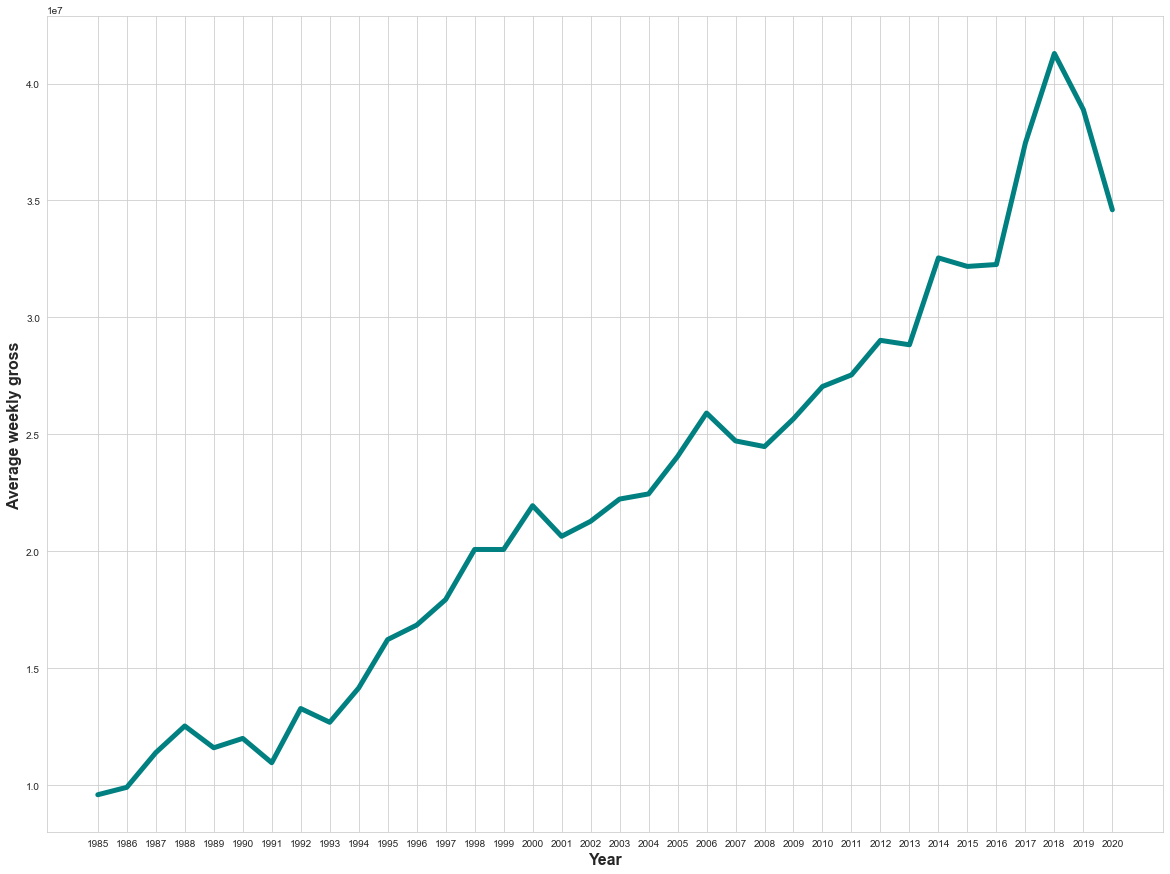

In [71]:
#group by month and plot from 1985 to 2022
fig, ax = plt.subplots(figsize=(20,15))
df = gross_data[['weekly_gross_overall','year','month','week_number']]
df2 = df.groupby(['year']).mean().reset_index()
sns.lineplot(x=df2['year'],y=df2['weekly_gross_overall'],color="teal",linewidth="5")
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Average weekly gross', fontsize = 16, fontdict=dict(weight='bold'))

Text(0, 0.5, 'Total yearly gross')

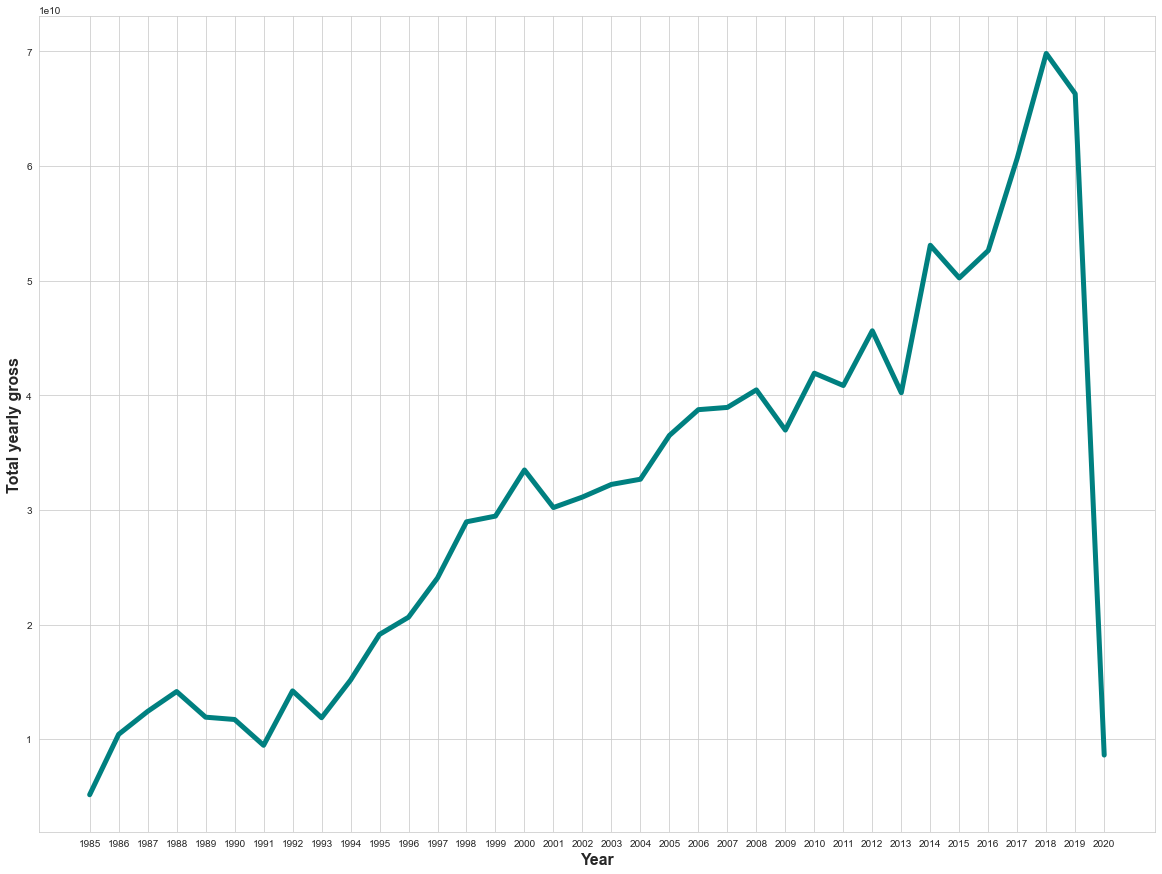

In [72]:
fig, ax = plt.subplots(figsize=(20,15))
df = gross_data[['weekly_gross_overall','year','month','week_number']]
df2 = df.groupby(['year']).sum().reset_index()
sns.lineplot(x=df2['year'],y=df2['weekly_gross_overall'],color="teal",linewidth="5")
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Total yearly gross', fontsize = 16, fontdict=dict(weight='bold'))

### Yearly trend of Weekly Gross (Overall) in every week

Text(0, 0.5, 'Gross')

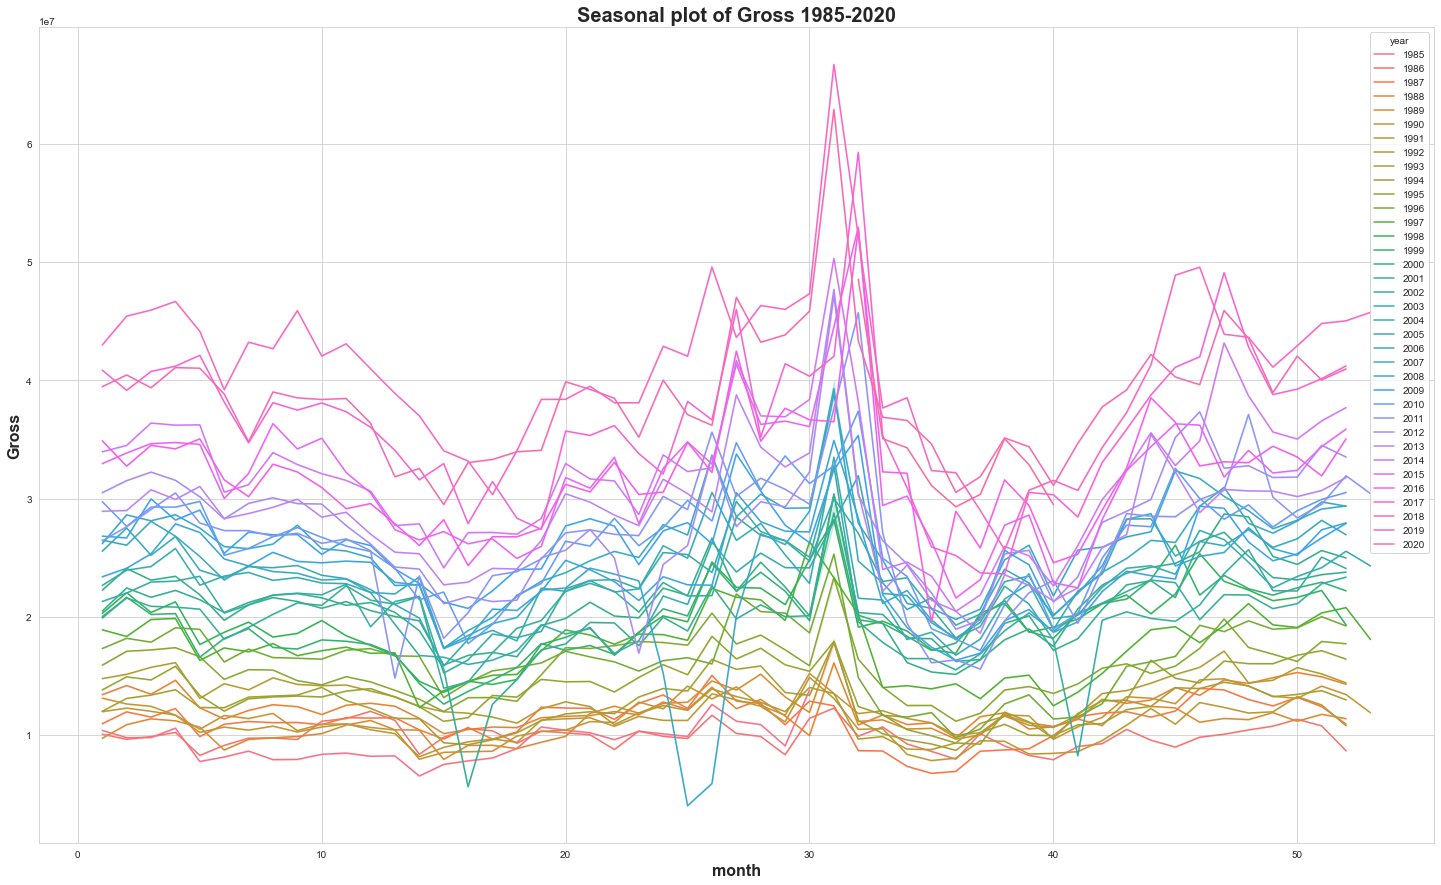

In [10]:
## September(Autumn) has been recorded as the most preferrable years.
### Also, every successive years, the month of September has been recorded as the most preferred successively
variable = 'weekly_gross_overall'
fig, ax = plt.subplots(figsize=(25,15))
palette = sns.color_palette("rocket_r", as_cmap=True)
sns.lineplot(gross_data['week_number'], gross_data[variable], hue=gross_data['year'])
ax.set_title('Seasonal plot of Gross 1985-2020', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))

Text(0, 0.5, 'Gross')

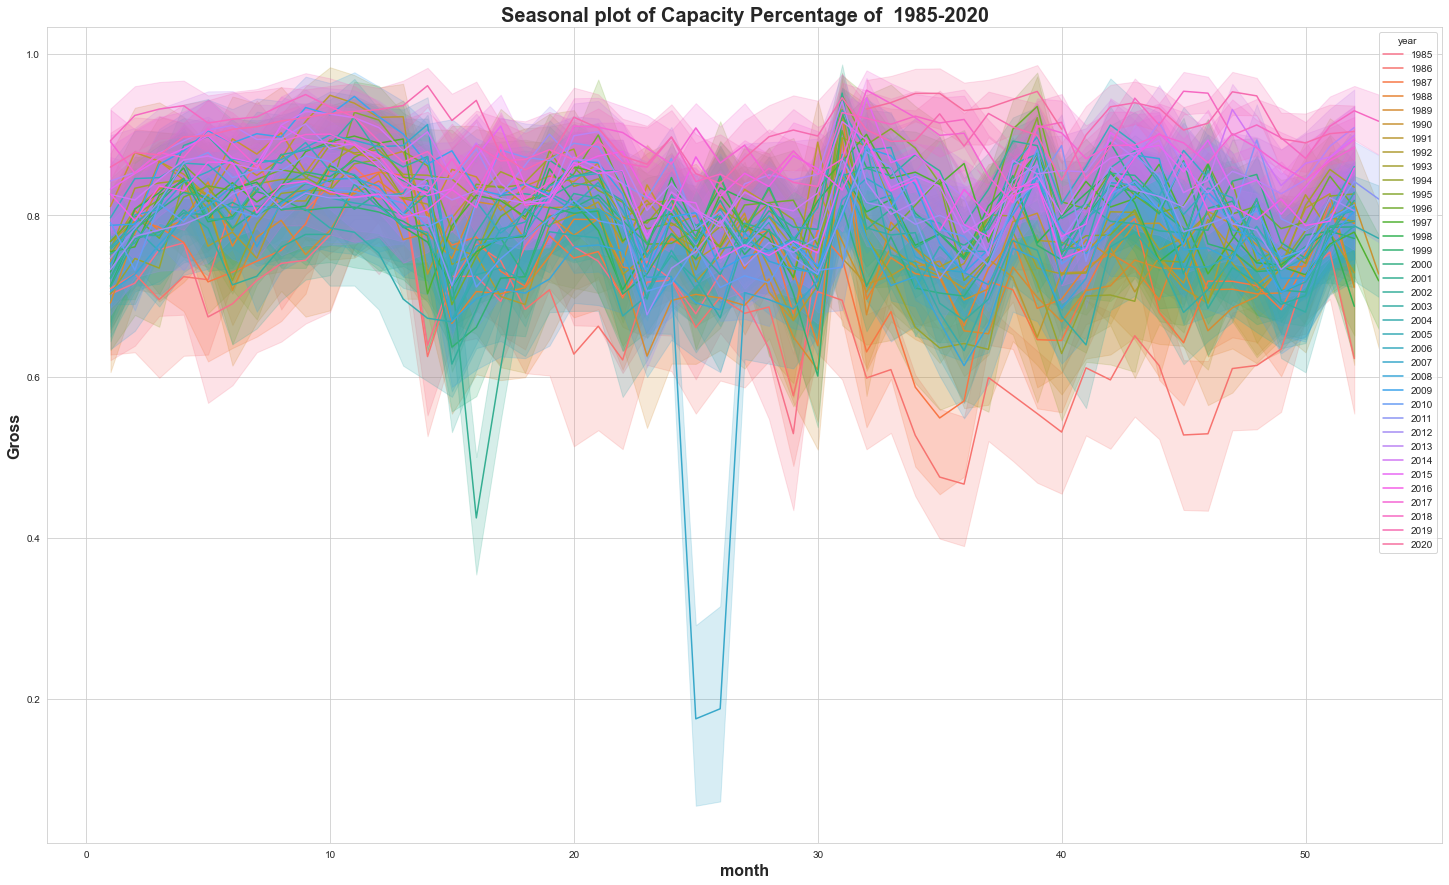

In [11]:
## Years of 2007-08 has been recorded the greatest dip ever in the entire data
variable = 'pct_capacity'
fig, ax = plt.subplots(figsize=(25,15))
palette = sns.color_palette("rocket_r", as_cmap=True)
sns.lineplot(gross_data['week_number'], gross_data[variable], hue=gross_data['year'])
ax.set_title('Seasonal plot of Capacity Percentage of  1985-2020', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))

Text(0, 0.5, 'Gross')

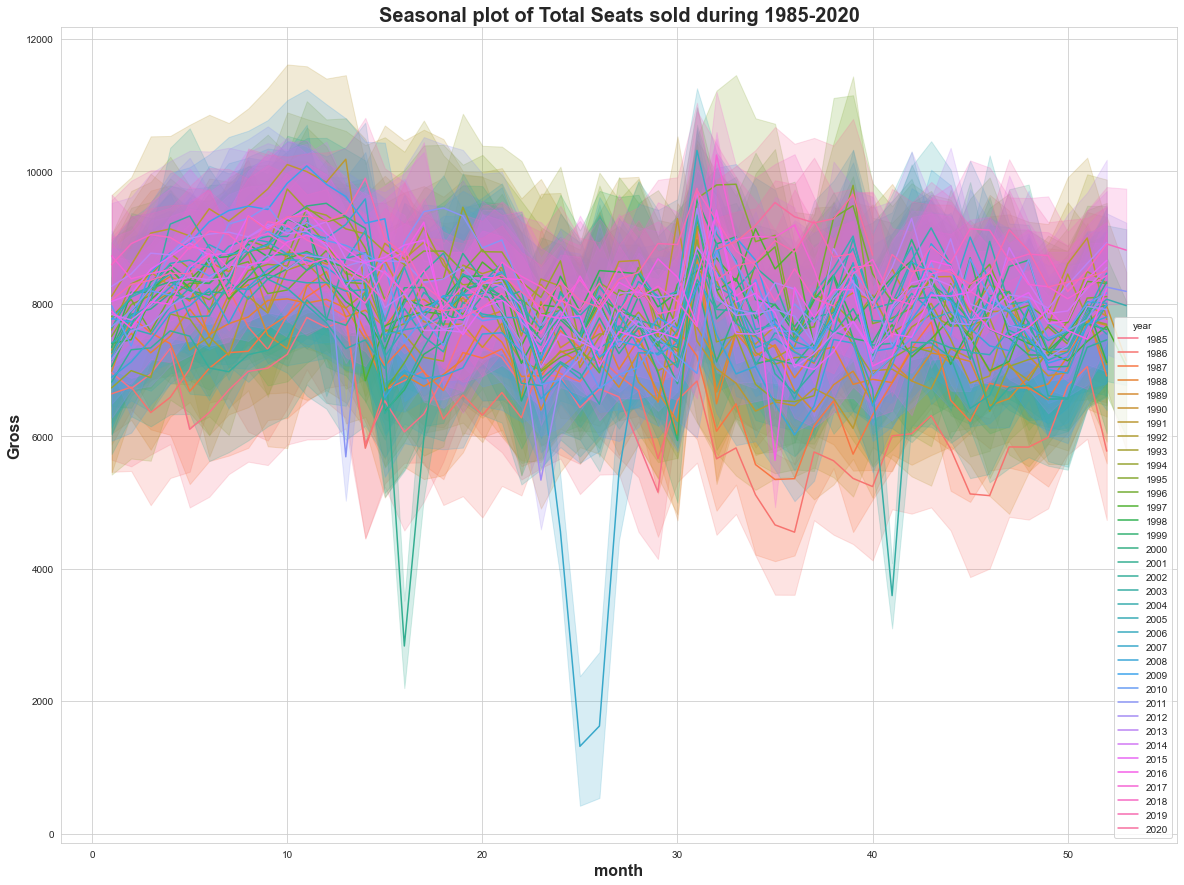

In [12]:
## Total Seats sold
## Along with the 2007-08 financial loss, a steepest dip has been recorded in 1999 and 2000
df = gross_data[['seats_sold','year','month', 'week_number']]
df2 = df.groupby(['week_number','year','month']).sum()
fig, ax = plt.subplots(figsize=(20,15))
palette = sns.color_palette("rocket_r", as_cmap=True)
sns.lineplot(gross_data['week_number'], gross_data['seats_sold'], hue=gross_data['year'])
ax.set_title('Seasonal plot of Total Seats sold during 1985-2020', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))

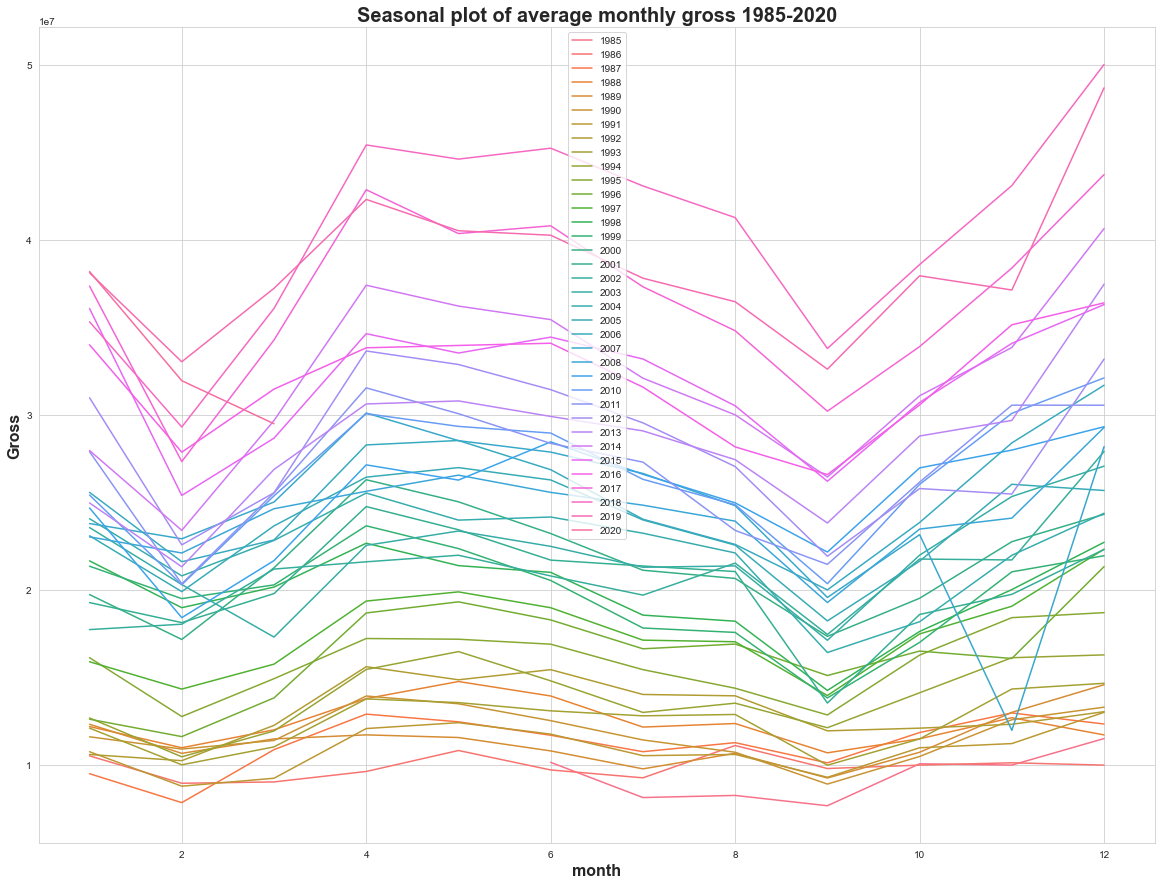

In [19]:
#Seasonal plot of monthly average of weekly gross from 1985 to 2020
#Compute monthly average:
df = gross_data[['weekly_gross_overall','year','month','week_number']]
df2 = df.groupby(['year','month']).mean().reset_index()
fig, ax = plt.subplots(figsize=(20,15))
palette = sns.color_palette("rocket_r", as_cmap=True)
sns.lineplot(df2['month'], df2['weekly_gross_overall'], hue=df2['year'])
ax.set_title('Seasonal plot of average monthly gross 1985-2020', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))
plt.legend()

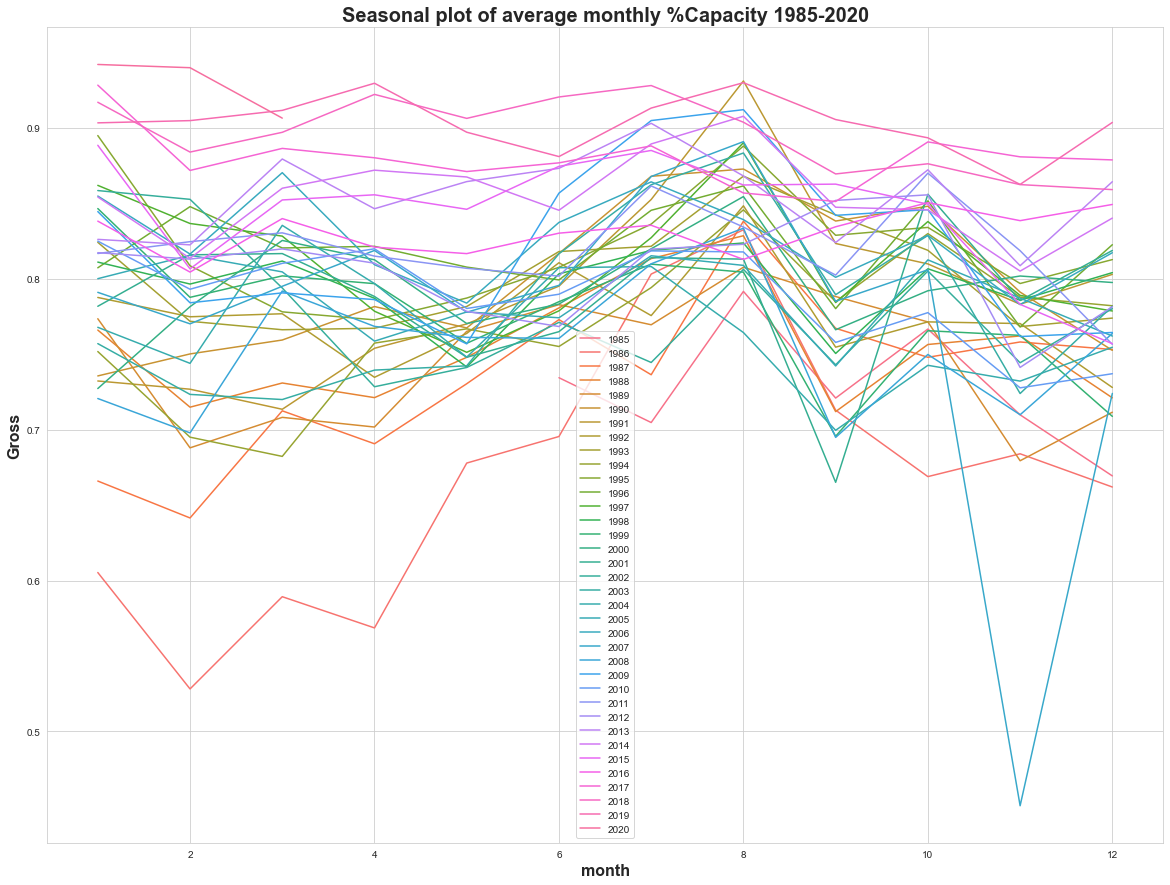

In [22]:
df = gross_data[['pct_capacity','year','month','week_number']]
df2 = df.groupby(['year','month']).mean().reset_index()
fig, ax = plt.subplots(figsize=(20,15))
palette = sns.color_palette("rocket_r", as_cmap=True)
sns.lineplot(df2['month'], df2['pct_capacity'], hue=df2['year'])
ax.set_title('Seasonal plot of average monthly %Capacity 1985-2020', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))
plt.legend()

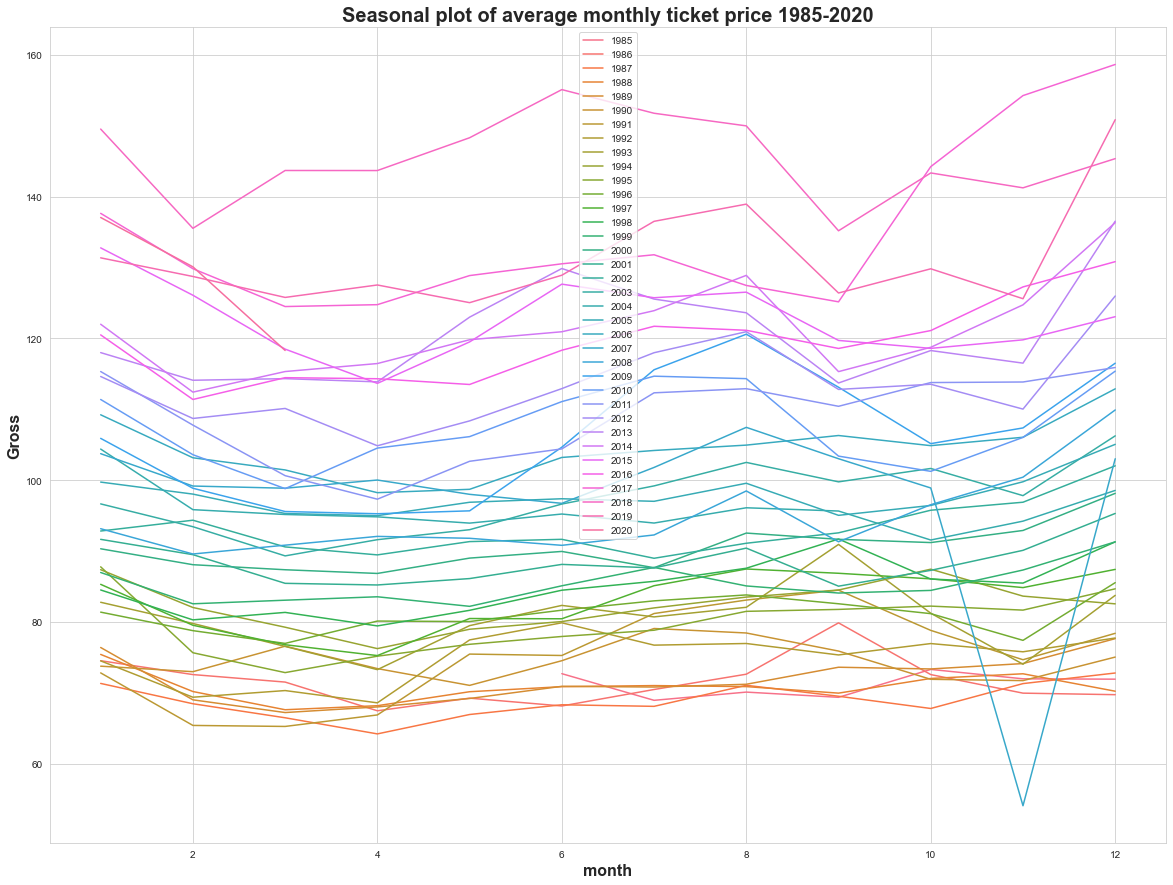

In [24]:
df = gross_data[['avg_ticket_price','year','month','week_number']]
df2 = df.groupby(['year','month']).mean().reset_index()
fig, ax = plt.subplots(figsize=(20,15))
palette = sns.color_palette("rocket_r", as_cmap=True)
sns.lineplot(df2['month'], df2['avg_ticket_price'], hue=df2['year'])
ax.set_title('Seasonal plot of average monthly ticket price 1985-2020', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))
plt.legend()

In [29]:
gross_data['show'].value_counts()

The Phantom of the Opera                     1677
Chicago                                      1218
The Lion King                                1166
Les Miserables                               1040
Cats                                          874
                                             ... 
Kristin Chenoweth: For The Girls                1
Criss Angel Raw - The Mindfreak Unplugged       1
Regina Spektor: Live on Broadway                1
Men Are from Mars, Women Are from Venus         1
Morrissey                                       1
Name: show, Length: 1122, dtype: int64

In [62]:
gross_data['theatre'].value_counts()
for i in gross_data['theatre'].value_counts().index:
    print(i,gross_data[gross_data['theatre']==i].weekly_gross_overall.sum())

Broadhurst Theatre 43266166736.67315
Minskoff Theatre 40611368417.411316
Majestic Theatre 38159355566.1723
Imperial Theatre 34721557801.59064
Ambassador Theatre 39055147123.32549
Gershwin Theatre 34941161811.366135
Eugene O'Neill Theatre 33810988441.465965
Lunt-Fontanne Theatre 34306526438.91617
St. James Theatre 31340023006.23
Sam S. Shubert Theatre 29811614515.75834
Booth Theatre 27943702807.869774
Marquis Theatre 28205278549.59252
Vivian Beaumont Theater 29250958574.617184
Richard Rodgers Theatre 30229925826.106197
Helen Hayes Theatre 26681962839.25025
Broadway Theatre 28459750650.458775
Neil Simon Theatre 27631625507.59365
Ethel Barrymore Theatre 26767428230.166573
Music Box Theatre 27653739528.878323
John Golden Theatre 26776243201.07287
Brooks Atkinson Theatre 25609738458.971733
Nederlander Theatre 26004818276.31685
Winter Garden Theatre 20672557713.472153
Circle in the Square Theatre 24252463124.88979
Walter Kerr Theatre 26299653967.35066
Palace Theatre 23393248452.62673
Lyceum 

In [67]:
gross_data['theatre'].value_counts()
for i in gross_data['theatre'].value_counts().index:
    print(i,gross_data[gross_data['theatre']==i].seats_sold.sum())

Broadhurst Theatre 15373076
Minskoff Theatre 21224483
Majestic Theatre 19306313
Imperial Theatre 16850471
Ambassador Theatre 11857246
Gershwin Theatre 19098491
Eugene O'Neill Theatre 10967819
Lunt-Fontanne Theatre 14792248
St. James Theatre 14124560
Sam S. Shubert Theatre 12177167
Booth Theatre 5620554
Marquis Theatre 12321063
Vivian Beaumont Theater 8205626
Richard Rodgers Theatre 10554716
Helen Hayes Theatre 4208202
Broadway Theatre 13180689
Neil Simon Theatre 10360902
Ethel Barrymore Theatre 7149846
Music Box Theatre 6483239
John Golden Theatre 5265883
Brooks Atkinson Theatre 6748022
Nederlander Theatre 7984476
Winter Garden Theatre 10552445
Circle in the Square Theatre 4338922
Walter Kerr Theatre 5826940
Palace Theatre 10436172
Lyceum Theatre 3647725
Studio 54 4909472
American Airlines Theatre 3591706
Al Hirschfeld Theatre 6491521
August Wilson Theatre 6352136
Cort Theatre 4162340
Virginia Theatre 4973441
Plymouth Theatre 4141781
New Amsterdam Theatre 8182534
Longacre Theatre 35938

In [66]:
gross_data['theatre'].value_counts()
for i in gross_data['theatre'].value_counts().index:
    print(i,gross_data[gross_data['theatre']==i].pct_capacity.sum())

Broadhurst Theatre 1523.5483
Minskoff Theatre 1561.0004999999999
Majestic Theatre 1504.4782
Imperial Theatre 1474.1231
Ambassador Theatre 1282.7982000000002
Gershwin Theatre 1334.8315
Eugene O'Neill Theatre 1295.5877999999998
Lunt-Fontanne Theatre 1214.2556
St. James Theatre 1087.4399
Sam S. Shubert Theatre 1055.0281
Booth Theatre 972.9541000000002
Marquis Theatre 998.6231
Vivian Beaumont Theater 1068.6705
Richard Rodgers Theatre 1001.2371
Helen Hayes Theatre 849.5784000000001
Broadway Theatre 966.6136
Neil Simon Theatre 963.586
Ethel Barrymore Theatre 864.7831
Music Box Theatre 830.1841000000001
John Golden Theatre 877.6064
Brooks Atkinson Theatre 840.9522
Nederlander Theatre 851.4183
Winter Garden Theatre 889.2687999999999
Circle in the Square Theatre 825.8979
Walter Kerr Theatre 816.875
Palace Theatre 801.9836
Lyceum Theatre 548.9971
Studio 54 678.3946000000001
American Airlines Theatre 645.5443
Al Hirschfeld Theatre 580.3311
August Wilson Theatre 651.2928999999999
Cort Theatre 512.

In [64]:
gross_data['show'].value_counts()
for i in gross_data['show'].value_counts().index:
    print(i,gross_data[gross_data['show']==i].weekly_gross_overall.sum())

The Phantom of the Opera 38159355566.1723
Chicago 32198230595.956665
The Lion King 31294375523.54783
Les Miserables 19152076569.44082
Cats 14003654799.590466
Wicked 24926415122.242283
Mamma Mia! 18611355876.82685
Beauty and the Beast 14074032414.486397
Rent 13920203619.259426
Jersey Boys 16296248786.707396
Miss Saigon 10119709070.052364
The Book of Mormon 15483394988.803698
Cabaret 8517904421.694401
42nd Street 6274801123.288311
A Chorus Line 5316137168.62945
Hairspray 7972368609.344399
Mary Poppins 8666655858.457043
Avenue Q 7733563048.030566
Kinky Boots 10794758897.73325
The Producers 7216254068.9378805
Aladdin 11097316120.00721
Beautiful: The Carole King Musical 10819932524.852602
Rock of Ages 8394094397.9936695
Grease 4932876103.369951
Smokey Joe's Cafe 4607644893.351836
Hamilton 8753039799.946535
Aida 5108812573.910146
Oh! Calcutta! 2381426606.8742285
La Cage aux Folles 3603261900.4893017
Crazy for You 2860987593.6977615
Jekyll & Hyde 4146070485.8934355
Spamalot 5025059613.491117


In [68]:
gross_data['show'].value_counts()
for i in gross_data['show'].value_counts().index:
    print(i,gross_data[gross_data['show']==i].seats_sold.sum())

The Phantom of the Opera 19306313
Chicago 9487120
The Lion King 15681635
Les Miserables 10590408
Cats 8719158
Wicked 12169601
Mamma Mia! 7566124
Beauty and the Beast 7609397
Rent 5026616
Jersey Boys 5142419
Miss Saigon 6584913
The Book of Mormon 4083348
Cabaret 2559930
42nd Street 3730505
A Chorus Line 2433131
Hairspray 3418653
Mary Poppins 3878174
Avenue Q 1731068
Kinky Boots 2971257
The Producers 3672795
Aladdin 4238881
Beautiful: The Carole King Musical 2282989
Rock of Ages 1476471
Grease 2001577
Smokey Joe's Cafe 1895490
Hamilton 2587041
Aida 2714193
Oh! Calcutta! 662070
La Cage aux Folles 1897473
Crazy for You 2090822
Jekyll & Hyde 1442609
Spamalot 2075781
Matilda The Musical 2077389
Waitress 1473758
Fiddler on the Roof 1848855
Gypsy 1760558
The Color Purple 1810582
Me and My Girl 2061437
Anything Goes 1331583
Dear Evan Hansen 1365633
The King and I 1426867
Billy Elliot: The Musical 1787108
Movin' Out 1436759
School of Rock - The Musical 1656427
Guys and Dolls 1434409
Spider-Man T

In [39]:
gross_data[gross_data['show']=='The Marriage of Kitty']

week_ending  week_number  weekly_gross_overall                   show  \
9802   1995-01-15           33          1.407026e+07  The Marriage of Kitty   
9818   1995-01-22           34          1.251187e+07  The Marriage of Kitty   
9834   1995-01-29           35          1.251407e+07  The Marriage of Kitty   
9850   1995-02-05           36          1.118285e+07  The Marriage of Kitty   
9869   1995-02-12           37          1.184863e+07  The Marriage of Kitty   
9888   1995-02-19           38          1.381902e+07  The Marriage of Kitty   
9906   1995-02-26           39          1.411251e+07  The Marriage of Kitty   
9928   1995-03-05           40          1.352687e+07  The Marriage of Kitty   
9951   1995-03-12           41          1.433419e+07  The Marriage of Kitty   
9976   1995-03-19           42          1.566711e+07  The Marriage of Kitty   
10001  1995-03-26           43          1.603172e+07  The Marriage of Kitty   

              theatre   weekly_gross  potential_gross  avg_ticket_price  \
9802   Comedy Theatre  173499.233514              NaN         55.018505   
9818   Comedy Theatre  220762.950162              NaN         58.722227   
9834   Comedy Theatre  202785.504973              NaN         53.061097   
9850   Comedy Theatre  214500.978760              NaN         65.032774   
9869   Comedy Theatre  252422.090782              NaN         66.544719   
9888   Comedy Theatre  256814.386739              NaN         67.520785   
9906   Comedy Theatre  267830.532938              NaN         66.276780   
9928   Comedy Theatre  274557.082207              NaN         68.767804   
9951   Comedy Theatre  278142.640861              NaN         69.666105   
9976   Comedy Theatre  351973.421911              NaN         88.167282   
10001  Comedy Theatre  354408.390848              NaN         88.778891   

       top_ticket_price  seats_sold  seats_in_theatre  pct_capacity  \
9802                NaN        3153               499        0.9027   
9818                NaN        3759               499        0.9416   
9834                NaN        3822               499        0.9574   
9850                NaN        3298               499        0.8262   
9869                NaN        3793               499        0.9502   
9888                NaN        3804               499        0.9529   
9906                NaN        4041               499        1.0123   
9928                NaN        3992               499        1.0000   
9951                NaN        3992               499        1.0000   
9976                NaN        3992               499        1.0000   
10001               NaN        3992               499        1.0000   

       performances  previews  year month_c  month  
9802              0         7  1995     Jan      1  
9818              0         8  1995     Jan      1  
9834              0         8  1995     Jan      1  
9850              5         3  1995     Feb      2  
9869              8         0  1995     Feb      2  
9888              8         0  1995     Feb      2  
9906              8         0  1995     Feb      2  
9928              8         0  1995     Mar      3  
9951              8         0  1995     Mar      3  
9976              8         0  1995     Mar      3  
10001             8         0  1995     Mar      3

In [38]:
gross_data[gross_data['theatre']=='Comedy Theatre']

week_ending  week_number  weekly_gross_overall                   show  \
9802   1995-01-15           33          1.407026e+07  The Marriage of Kitty   
9818   1995-01-22           34          1.251187e+07  The Marriage of Kitty   
9834   1995-01-29           35          1.251407e+07  The Marriage of Kitty   
9850   1995-02-05           36          1.118285e+07  The Marriage of Kitty   
9869   1995-02-12           37          1.184863e+07  The Marriage of Kitty   
9888   1995-02-19           38          1.381902e+07  The Marriage of Kitty   
9906   1995-02-26           39          1.411251e+07  The Marriage of Kitty   
9928   1995-03-05           40          1.352687e+07  The Marriage of Kitty   
9951   1995-03-12           41          1.433419e+07  The Marriage of Kitty   
9976   1995-03-19           42          1.566711e+07  The Marriage of Kitty   
10001  1995-03-26           43          1.603172e+07  The Marriage of Kitty   

              theatre   weekly_gross  potential_gross  avg_ticket_price  \
9802   Comedy Theatre  173499.233514              NaN         55.018505   
9818   Comedy Theatre  220762.950162              NaN         58.722227   
9834   Comedy Theatre  202785.504973              NaN         53.061097   
9850   Comedy Theatre  214500.978760              NaN         65.032774   
9869   Comedy Theatre  252422.090782              NaN         66.544719   
9888   Comedy Theatre  256814.386739              NaN         67.520785   
9906   Comedy Theatre  267830.532938              NaN         66.276780   
9928   Comedy Theatre  274557.082207              NaN         68.767804   
9951   Comedy Theatre  278142.640861              NaN         69.666105   
9976   Comedy Theatre  351973.421911              NaN         88.167282   
10001  Comedy Theatre  354408.390848              NaN         88.778891   

       top_ticket_price  seats_sold  seats_in_theatre  pct_capacity  \
9802                NaN        3153               499        0.9027   
9818                NaN        3759               499        0.9416   
9834                NaN        3822               499        0.9574   
9850                NaN        3298               499        0.8262   
9869                NaN        3793               499        0.9502   
9888                NaN        3804               499        0.9529   
9906                NaN        4041               499        1.0123   
9928                NaN        3992               499        1.0000   
9951                NaN        3992               499        1.0000   
9976                NaN        3992               499        1.0000   
10001               NaN        3992               499        1.0000   

       performances  previews  year month_c  month  
9802              0         7  1995     Jan      1  
9818              0         8  1995     Jan      1  
9834              0         8  1995     Jan      1  
9850              5         3  1995     Feb      2  
9869              8         0  1995     Feb      2  
9888              8         0  1995     Feb      2  
9906              8         0  1995     Feb      2  
9928              8         0  1995     Mar      3  
9951              8         0  1995     Mar      3  
9976              8         0  1995     Mar      3  
10001             8         0  1995     Mar      3

The `Comedy Theatre` is one of the theatre which has been started in 1995 and ended in 1995. The theater ran only one show `The Marriage of Kitty `. The show evidenced an increase in potential_gross and percentage capacity of the show which revealed the interest of the people, but is not clear as of why the show closed in that year.
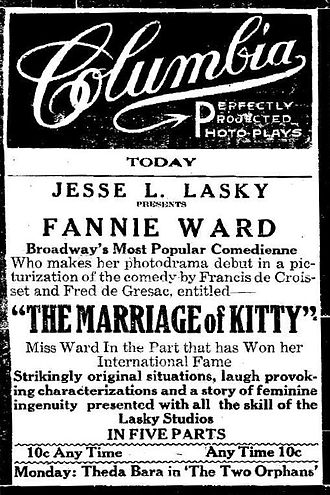

## Reference
https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.month_plot.html